# Homework: Basic Artificial Neural Networks

The goal of this homework is simple, yet an actual implementation may take some time :). We are going to write an Artificial Neural Network (almost) from scratch. The software design was heavily inspired by [PyTorch](http://pytorch.org) which is the main framework of our course 

This homework requires sending **multiple** files, please do not forget to include all the files when sending to TA. The list of files:
- This notebook
- homework_modules.ipynb with all blocks implemented (except maybe `Conv2d` and `MaxPool2d` layers implementation which are part of 'advanced' version of this homework)
- homework_differentiation.ipynb

In [138]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Framework

Implement everything in `Modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return **AND** store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

### Tech note
Prefer using `np.multiply`, `np.add`, `np.divide`, `np.subtract` instead of `*`,`+`,`/`,`-` for better memory handling.

Example: suppose you allocated a variable 

```
a = np.zeros(...)
```
So, instead of
```
a = b + c  # will be reallocated, GC needed to free
``` 
You can use: 
```
np.add(b,c,out = a) # puts result in `a`
```

In [2]:
# (re-)load layers
%run homework_modules.ipynb

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

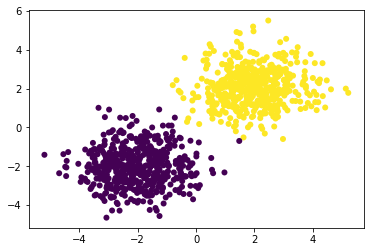

In [3]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

In [24]:
net = Sequential()
net.add(Linear(2, 2))
net.add(LogSoftMax())

criterion = ClassNLLCriterion()

print(net)

# Test something like that then 

# net = Sequential()
# net.add(Linear(2, 4))
# net.add(ReLU())
# net.add(Linear(4, 2))
# net.add(LogSoftMax())

Linear 2 -> 2
LogSoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [25]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 50
batch_size = 128

In [26]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

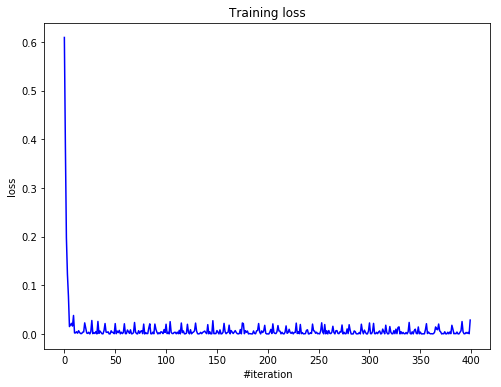

Current loss: 0.028660


In [27]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

In [21]:

net = Sequential()
net.add(Linear(2, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(LogSoftMax())
print(net)

Linear 2 -> 4
ReLU
Linear 4 -> 2
LogSoftMax



In [22]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 50
batch_size = 128

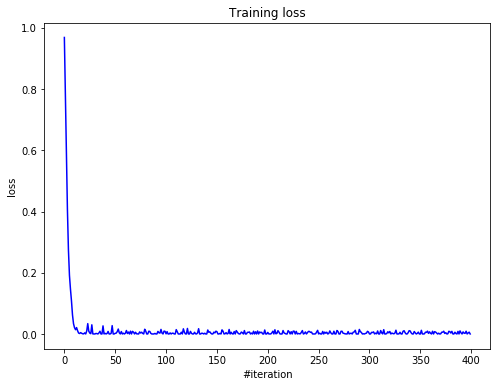

Current loss: 0.000011


In [23]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

# Digit classification 

We are using old good [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset.

In [28]:
import mnist
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset()

One-hot encode the labels first.

In [33]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(50000, 28, 28) (10000, 28, 28) (10000, 28, 28)
(50000,) (10000,) (10000,)


In [34]:
# Your code goes here. ################################################
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [36]:
binarizer = LabelBinarizer()
y_train = binarizer.fit_transform(y_train)
y_val = binarizer.transform(y_val)
y_test = binarizer.transform(y_test)
print(y_train.shape, y_val.shape, y_test.shape)

(50000, 10) (10000, 10) (10000, 10)


In [37]:
X_train = np.array([x.ravel() for x in X_train])
X_val = np.array([x.ravel() for x in X_val])
X_test = np.array([x.ravel() for x in X_test])
print(X_train.shape, X_val.shape, X_test.shape)

(50000, 784) (10000, 784) (10000, 784)


- **Compare** `ReLU`, `ELU`, `LeakyReLU`, `SoftPlus` activation functions. 
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.
- **Try** inserting `BatchNormalization` (folowed by `ChannelwiseScaling`) between `Linear` module and activation functions.
- Plot the losses both from activation functions comparison and `BatchNormalization` comparison on one plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be goodlooking.
- Plot the losses for two networks: one trained by momentum_sgd, another one trained by Adam. Which one performs better?
- Hint: good logloss for MNIST should be around 0.5. 

In [45]:
from tqdm import tqdm

In [114]:
def train_loop(net : Sequential, n_epoch : int, batch_size: int, optimizer_config: dict, optimizer_state: dict):
    train_loss_history = []
    val_loss_history = []
    for i in tqdm(range(n_epoch)):
        net.train()
        for x_batch, y_batch in get_batches((X_train, y_train), batch_size):

            net.zeroGradParameters()

            # Forward
            predictions = net.forward(x_batch)
            loss = criterion.forward(predictions, y_batch)

            # Backward
            dp = criterion.backward(predictions, y_batch)
            net.backward(x_batch, dp)

            # Update weights
            adam_optimizer(net.getParameters(), 
                         net.getGradParameters(), 
                         optimizer_config,
                         optimizer_state)      

            train_loss_history.append(loss)
        it = 0.0
        val_loss = 0.0
        net.evaluate()
        for x_batch, y_batch in get_batches((X_val, y_val), batch_size):
            predictions = net.forward(x_batch)
            loss = criterion.forward(predictions, y_batch)
            val_loss += loss
            it += 1
        val_loss_history.append(val_loss / it)
        # Visualize
        display.clear_output(wait=True)
        plt.figure(figsize=(16, 10))
        plt.subplot(1, 2, 1)
        plt.title("Training loss")
        plt.xlabel("#iteration")
        plt.ylabel("loss")
        plt.plot(train_loss_history, 'b')
        plt.subplot(1, 2, 2)
        plt.title("val loss")
        plt.xlabel('#epoch')
        plt.ylabel('loss')
        plt.plot(range(1, i+2, 1), val_loss_history)
        plt.show()

        print('Current avg loss over 10 batches: {}, val_loss: {}, epoch: {}'.format(np.mean(train_loss_history[-10:]),
                                                                                     val_loss_history[-1],
                                                                                     i))
    print("validation loss history: ", np.array(val_loss_history))
    print('best loss after epoch: {} is {}'.format(np.argmin(val_loss_history) + 1, np.min(val_loss_history)))
    return train_loss_history, val_loss_history

In [113]:
def def_net(dims: list, activation: Module, batchnorm=False):
    net = Sequential()
    for d1, d2 in zip(dims[:-1], dims[1:]):
        net.add(Linear(d1, d2))
        net.add(activation())
        if batchnorm:
            net.add(BatchNormalization(0.5))
            net.add(ChannelwiseScaling(d2))
    net.add(Linear(d2, 10))
    net.add(LogSoftMax())
    print(net)
    return net

## ReLU

In [118]:
net = def_net([784, 392, 196, 98, 49], ReLU)

# Iptimizer params
optimizer_config = {'learning_rate' : 0.0001, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8}
optimizer_state = {}

# Looping params
n_epoch = 100
batch_size = 256

Linear 784 -> 392
ReLU
Linear 392 -> 196
ReLU
Linear 196 -> 98
ReLU
Linear 98 -> 49
ReLU
Linear 49 -> 10
LogSoftMax



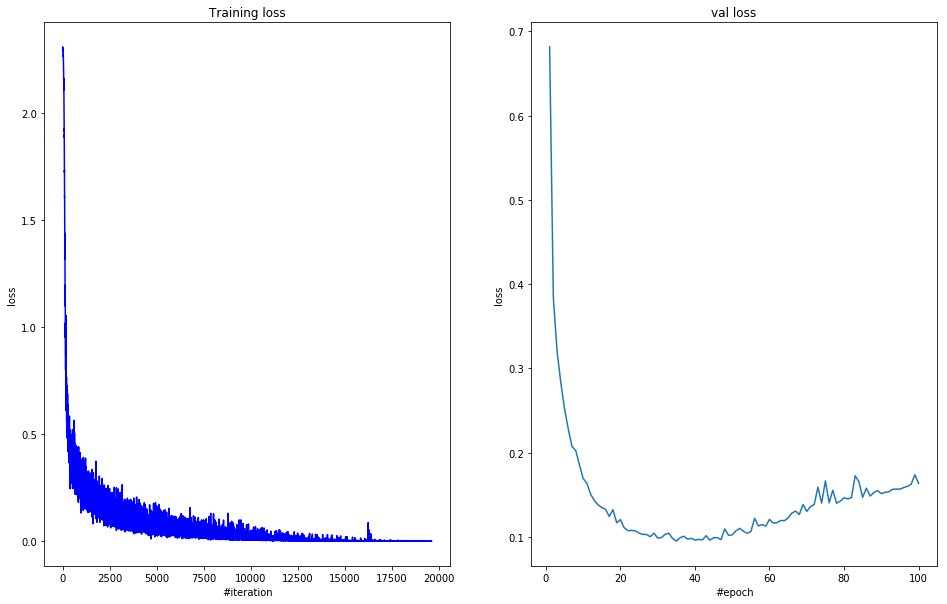






100%|██████████| 100/100 [06:39<00:00,  3.91s/it]






Current avg loss over 10 batches: 0.00021086066080884254, val_loss: 0.16351556197251516, epoch: 99
validation loss history:  [0.68147154 0.38350788 0.32024843 0.28310067 0.25203878 0.22806751
 0.20733218 0.20251431 0.18554563 0.16915125 0.16368351 0.15059753
 0.14307981 0.13798449 0.13477926 0.13278737 0.1243237  0.13224744
 0.11673375 0.12046949 0.11088425 0.10741912 0.10762664 0.10721295
 0.10442887 0.10289108 0.10288534 0.10021047 0.10439559 0.09860525
 0.09915432 0.10308339 0.10431315 0.09806814 0.09499079 0.09896604
 0.10078027 0.09734348 0.09822961 0.09619676 0.09695842 0.09646229
 0.10138229 0.09607505 0.09898992 0.09914124 0.09664536 0.10949023
 0.10179837 0.10236016 0.10723589 0.1100564  0.10671854 0.10431098
 0.10618711 0.12206937 0.11308688 0.11444478 0.11283126 0.12078944
 0.11629444 0.11685398 0.11948425 0.11917259 0.12245116 0.12820474
 0.1305636  0.12654156 0.13846536 0.13020212 0.13601575 0.13844542
 0.15908924 0.14009623 0.16645688 0.14051275 0.15534992 0.13995234
 0.1

In [119]:
%%time
relu_train, relu_val = train_loop(net, n_epoch, batch_size, optimizer_config, optimizer_state)

## ELU

In [120]:
net = def_net([784, 392, 196, 98, 49], ELU)

# Iptimizer params
optimizer_config = {'learning_rate' : 0.0001, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8}
optimizer_state = {}

# Looping params
n_epoch = 100
batch_size = 256

Linear 784 -> 392
ELU
Linear 392 -> 196
ELU
Linear 196 -> 98
ELU
Linear 98 -> 49
ELU
Linear 49 -> 10
LogSoftMax



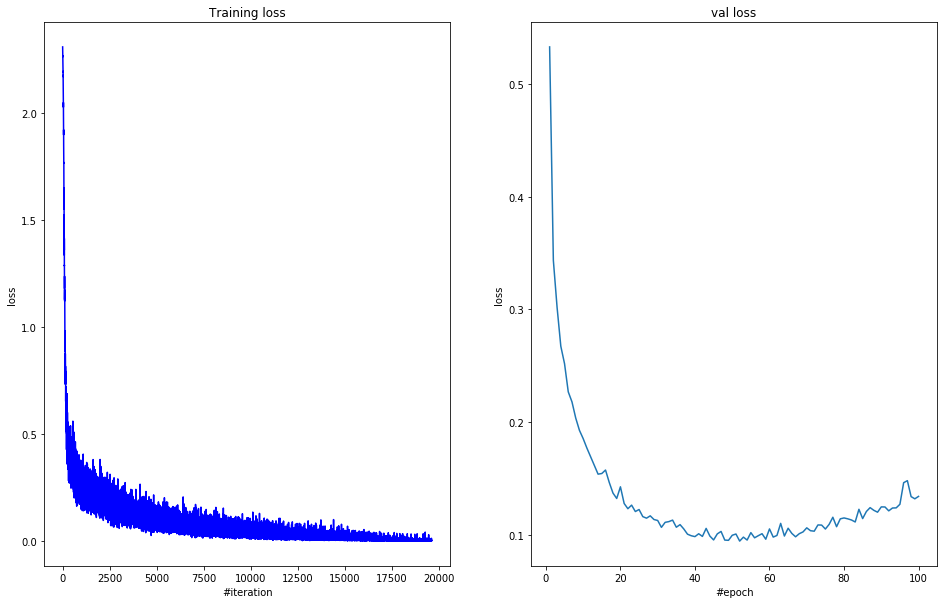






100%|██████████| 100/100 [07:31<00:00,  4.33s/it]






Current avg loss over 10 batches: 0.004525669933847056, val_loss: 0.13421959066107675, epoch: 99
validation loss history:  [0.53257877 0.34341733 0.30176595 0.26732699 0.25184909 0.22686833
 0.21795406 0.20369775 0.1927663  0.18545243 0.17704759 0.1693433
 0.16166124 0.15393338 0.15450746 0.15758182 0.1465933  0.13718178
 0.13238048 0.14271924 0.12792936 0.12331294 0.12647833 0.12080974
 0.12258025 0.11630485 0.11492557 0.11698961 0.11373406 0.11288229
 0.10679101 0.11122523 0.11188367 0.11320758 0.10690937 0.10920019
 0.10537657 0.10072947 0.09934883 0.09858057 0.10110875 0.09876248
 0.1058574  0.09906928 0.09563317 0.10101952 0.10316498 0.09551318
 0.09528847 0.09976491 0.10088417 0.09461233 0.09811919 0.09553945
 0.10211157 0.09752896 0.09941162 0.10115577 0.09629021 0.10539146
 0.09816596 0.09959805 0.11031976 0.0990976  0.10601664 0.1013964
 0.09842036 0.10119456 0.10275176 0.10635881 0.10381656 0.10337858
 0.1089281  0.10878773 0.10529901 0.1094156  0.11574319 0.10736499
 0.11433

In [121]:
%%time
elu_train, elu_val = train_loop(net, n_epoch, batch_size, optimizer_config, optimizer_state)

## LeakyReLU

In [122]:
net = def_net([784, 392, 196, 98, 49], LeakyReLU)

# Iptimizer params
optimizer_config = {'learning_rate' : 0.0001, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8}
optimizer_state = {}

# Looping params
n_epoch = 100
batch_size = 256

Linear 784 -> 392
LeakyReLU
Linear 392 -> 196
LeakyReLU
Linear 196 -> 98
LeakyReLU
Linear 98 -> 49
LeakyReLU
Linear 49 -> 10
LogSoftMax



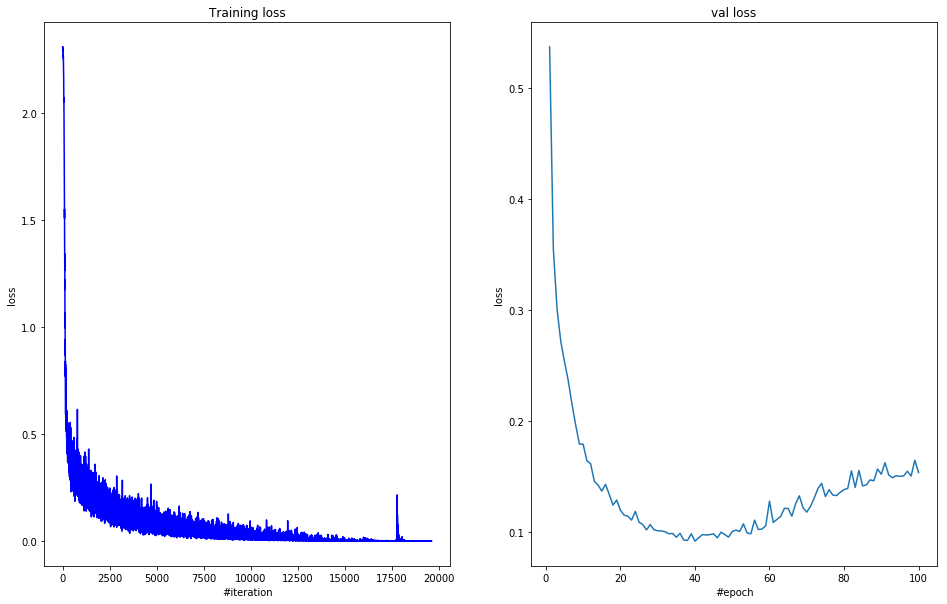






100%|██████████| 100/100 [12:22<00:00,  7.82s/it]






Current avg loss over 10 batches: 0.0003209687544622361, val_loss: 0.15389324708027158, epoch: 99
validation loss history:  [0.53738789 0.35509909 0.30084263 0.27192919 0.25357294 0.23672864
 0.21551404 0.1965563  0.17956522 0.17935988 0.1645361  0.16183514
 0.14591228 0.14260572 0.13720536 0.14324123 0.13422391 0.12456431
 0.12911026 0.11992555 0.11551847 0.1145736  0.11107329 0.11893778
 0.10909348 0.10709908 0.10220625 0.10702678 0.1023214  0.10143854
 0.101315   0.10047937 0.09870453 0.09905759 0.09559551 0.09907999
 0.09310166 0.09273167 0.09873203 0.09213476 0.09518231 0.09797351
 0.0976332  0.09795654 0.09865473 0.09502976 0.10014169 0.09802077
 0.09572133 0.10073514 0.10203677 0.10077687 0.10771638 0.09943286
 0.09870309 0.11095275 0.10258925 0.10300178 0.1060766  0.12806786
 0.10897183 0.11165573 0.11435327 0.12159977 0.12152812 0.11460223
 0.12567319 0.13291782 0.1222259  0.11823241 0.12338391 0.13084091
 0.13955579 0.14414474 0.13231463 0.13846995 0.13357644 0.13319504
 0.13

In [123]:
%%time
leaky_train, leaky_val = train_loop(net, n_epoch, batch_size, optimizer_config, optimizer_state)

## SoftPlus

In [124]:
net = def_net([784, 392, 196, 98, 49], SoftPlus)

# Iptimizer params
optimizer_config = {'learning_rate' : 0.0001, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8}
optimizer_state = {}

# Looping params
n_epoch = 100
batch_size = 256

Linear 784 -> 392
SoftPlus
Linear 392 -> 196
SoftPlus
Linear 196 -> 98
SoftPlus
Linear 98 -> 49
SoftPlus
Linear 49 -> 10
LogSoftMax



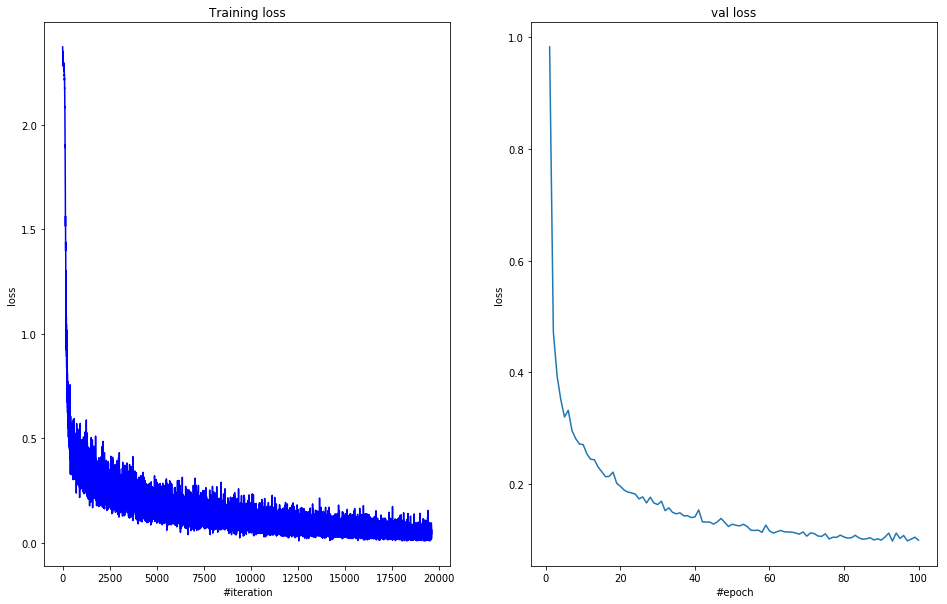






100%|██████████| 100/100 [12:39<00:00,  7.54s/it]






Current avg loss over 10 batches: 0.043763411111562824, val_loss: 0.09977514837116348, epoch: 99
validation loss history:  [0.98230022 0.47235017 0.39386872 0.35102924 0.32019447 0.33221507
 0.29589202 0.28142864 0.27191895 0.27077571 0.25417791 0.24452617
 0.24376853 0.23069357 0.2222507  0.21337721 0.21400553 0.2215882
 0.20172324 0.19606213 0.18937077 0.18582446 0.18433867 0.18215538
 0.17362812 0.17723681 0.16639956 0.17667287 0.16625492 0.1634892
 0.16942973 0.15257461 0.15766293 0.14949817 0.14691675 0.14874369
 0.1433517  0.14357188 0.14022734 0.14143907 0.15394963 0.13256713
 0.13224226 0.13211535 0.12848911 0.13262794 0.13862512 0.13161884
 0.12420722 0.12835407 0.12647382 0.12535987 0.12818256 0.1244005
 0.11762916 0.11715589 0.11777721 0.11375701 0.12679586 0.11644574
 0.11250048 0.11489535 0.11719781 0.11467312 0.1145355  0.11418945
 0.11263203 0.11054755 0.11461815 0.10699294 0.11280188 0.11156462
 0.10727386 0.10659781 0.11108769 0.1020682  0.1050421  0.10484321
 0.108782

In [125]:
%%time
soft_train, soft_val = train_loop(net, n_epoch, batch_size, optimizer_config, optimizer_state)

### Вывод
Как видно из сравнительных запусков, на 100 эпох время отличается незначительно. Лучшее качество дает LeakyReLU, как по времени достижения (40 эпох) так и по абсолютному значению.
По скорости порядок такой: SoftPlus, ReLU, LeakyReLU, ELU. Но разница во времени незначительна.

 ## Сравнение с батчнормом

In [126]:
net = def_net([784, 392, 196, 98, 49],  LeakyReLU, batchnorm=True)

# Iptimizer params
optimizer_config = {'learning_rate' : 0.0001, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8}
optimizer_state = {}

# Looping params
n_epoch = 100
batch_size = 256

Linear 784 -> 392
LeakyReLU
BatchNormalization
ChannelwiseScaling
Linear 392 -> 196
LeakyReLU
BatchNormalization
ChannelwiseScaling
Linear 196 -> 98
LeakyReLU
BatchNormalization
ChannelwiseScaling
Linear 98 -> 49
LeakyReLU
BatchNormalization
ChannelwiseScaling
Linear 49 -> 10
LogSoftMax



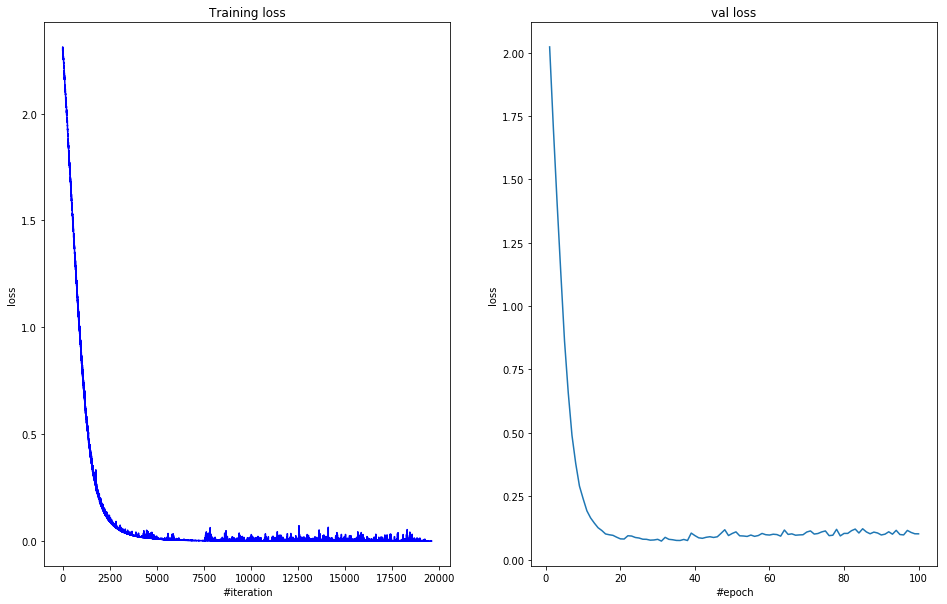






100%|██████████| 100/100 [08:23<00:00,  4.94s/it]






Current avg loss over 10 batches: 5.034226387246243e-05, val_loss: 0.10150356534376867, epoch: 99
validation loss history:  [2.02278226 1.70327842 1.40890563 1.13064554 0.86188463 0.65784321
 0.48972163 0.37929541 0.29019903 0.23972709 0.19233612 0.16423054
 0.1438582  0.12556359 0.11467921 0.10110189 0.09787678 0.09551107
 0.08813886 0.08161085 0.08109853 0.09392361 0.09282257 0.08710287
 0.08498306 0.08027583 0.07987354 0.07652936 0.07729232 0.0798278
 0.07287451 0.08764912 0.07982097 0.07821238 0.07553742 0.07525259
 0.07932631 0.07512548 0.10439566 0.09442029 0.08584357 0.08386319
 0.08783244 0.09005285 0.08720222 0.08991541 0.10342295 0.11763756
 0.09476604 0.10299019 0.10927622 0.09374743 0.09297887 0.09124943
 0.09668563 0.09158915 0.09480094 0.10302419 0.09805841 0.09673101
 0.09998953 0.09859333 0.0923672  0.11651925 0.09920083 0.10143596
 0.09606709 0.09723278 0.09795594 0.10859495 0.11302288 0.10062081
 0.10274967 0.10903444 0.11294436 0.09437294 0.09601886 0.11930377
 0.093

In [116]:
%%time
train_loss, val_loss = train_loop(net, n_epoch, batch_size, optimizer_config, optimizer_state)

In [ ]:
# Your code goes here. ################################################

Write your personal opinion on the activation functions, think about computation times too. Does `BatchNormalization` help?

### Вывод 
Как можно видеть батчнорм делает обучение гораздо более стабильным и улучшает качество, но время обучения заметно увеличивается, при этом по эпохам оно уменьшается.

### сравние с моментумом

In [ ]:
# Your answer goes here. ################################################

In [127]:
net = def_net([784, 392, 196, 98, 49], ReLU)

# Iptimizer params
optimizer_config = {'learning_rate' : 0.0001, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 100
batch_size = 256

Linear 784 -> 392
ReLU
Linear 392 -> 196
ReLU
Linear 196 -> 98
ReLU
Linear 98 -> 49
ReLU
Linear 49 -> 10
LogSoftMax



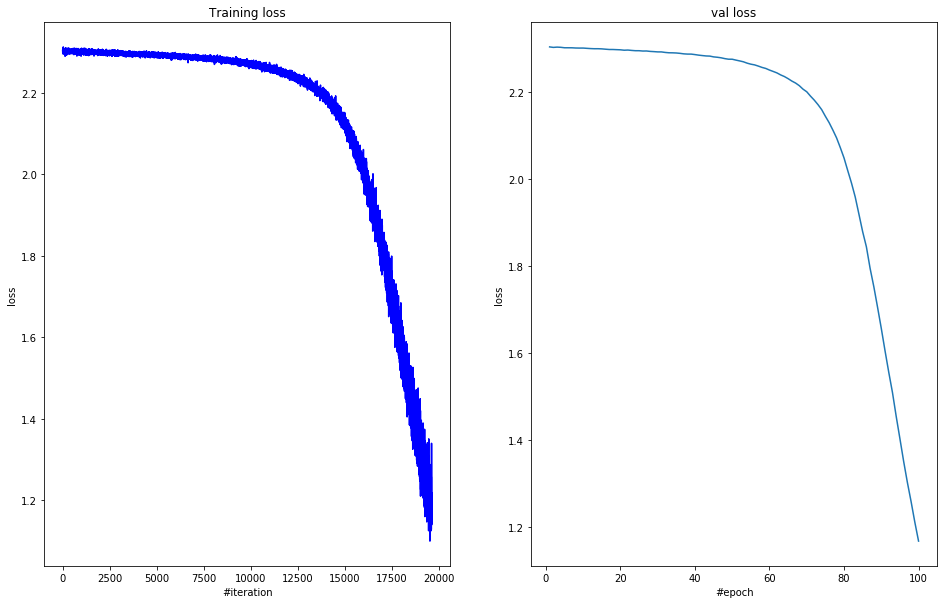






100%|██████████| 100/100 [09:59<00:00,  6.74s/it]






Current avg loss over 10 batches: 1.1898029743906406, val_loss: 1.1677522211912417, epoch: 99
validation loss history:  [2.3027622  2.30164249 2.30227937 2.30183524 2.30079434 2.3007735
 2.30072695 2.3002192  2.30006552 2.30011553 2.29948035 2.29892841
 2.29858349 2.29861025 2.29824509 2.29750236 2.29683094 2.29680988
 2.29642895 2.2960919  2.29516216 2.29554426 2.29471567 2.29404573
 2.29402379 2.29327619 2.29338799 2.29244003 2.29192589 2.2913114
 2.29125517 2.29008161 2.28929532 2.28915659 2.28879831 2.28795574
 2.28681401 2.28626683 2.28621852 2.28511774 2.28383856 2.2828659
 2.28196904 2.28163941 2.27984935 2.27899148 2.27777545 2.2758921
 2.27451188 2.27446948 2.27243874 2.27058854 2.26857872 2.26543737
 2.26310034 2.26148399 2.25872077 2.25564493 2.25329763 2.24958817
 2.24637092 2.24305303 2.23841947 2.23470259 2.22981977 2.22431274
 2.21976489 2.21372483 2.20571227 2.19970578 2.18974236 2.18068602
 2.17035601 2.15875088 2.14337654 2.12887912 2.11187818 2.09384018
 2.0714927  2

In [128]:

train_loss_history = []
val_loss_history = []
for i in tqdm(range(n_epoch)):
    net.train()
    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):

        net.zeroGradParameters()

        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)

        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)

        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      

        train_loss_history.append(loss)
    it = 0.0
    val_loss = 0.0
    net.evaluate()
    for x_batch, y_batch in get_batches((X_val, y_val), batch_size):
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
        val_loss += loss
        it += 1
    val_loss_history.append(val_loss / it)
    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(16, 10))
    plt.subplot(1, 2, 1)
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(train_loss_history, 'b')
    plt.subplot(1, 2, 2)
    plt.title("val loss")
    plt.xlabel('#epoch')
    plt.ylabel('loss')
    plt.plot(range(1, i+2, 1), val_loss_history)
    plt.show()

    print('Current avg loss over 10 batches: {}, val_loss: {}, epoch: {}'.format(np.mean(train_loss_history[-10:]),
                                                                                 val_loss_history[-1],
                                                                                 i))
print("validation loss history: ", np.array(val_loss_history))
print('best loss after epoch: {} is {}'.format(np.argmin(val_loss_history) + 1, np.min(val_loss_history)))

### Вывод
как видно адам сходится гораздо лучше

**Finally**, use all your knowledge to build a super cool model on this dataset. Use **dropout** to prevent overfitting, play with **learning rate decay**. You can use **data augmentation** such as rotations, translations to boost your score. Use your knowledge and imagination to train a model. Don't forget to call `training()` and `evaluate()` methods to set desired behaviour of `BatchNormalization` and `Dropout` layers.

In [ ]:
# Your code goes here. ################################################

In [130]:
dims = [784, 392, 196, 98, 49]

net = Sequential()
for d1, d2 in zip(dims[:-1], dims[1:]):
    net.add(Linear(d1, d2))
    net.add(LeakyReLU())
    net.add(BatchNormalization(0.5))
    net.add(ChannelwiseScaling(d2))
    net.add(Dropout(p=0.3))
net.add(Linear(d2, 10))
net.add(LogSoftMax())
print(net)
optimizer_config = {'learning_rate' : 0.0001, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8}
optimizer_state = {}

# Looping params
n_epoch = 100
batch_size = 256

Linear 784 -> 392
LeakyReLU
BatchNormalization
ChannelwiseScaling
Dropout
Linear 392 -> 196
LeakyReLU
BatchNormalization
ChannelwiseScaling
Dropout
Linear 196 -> 98
LeakyReLU
BatchNormalization
ChannelwiseScaling
Dropout
Linear 98 -> 49
LeakyReLU
BatchNormalization
ChannelwiseScaling
Dropout
Linear 49 -> 10
LogSoftMax



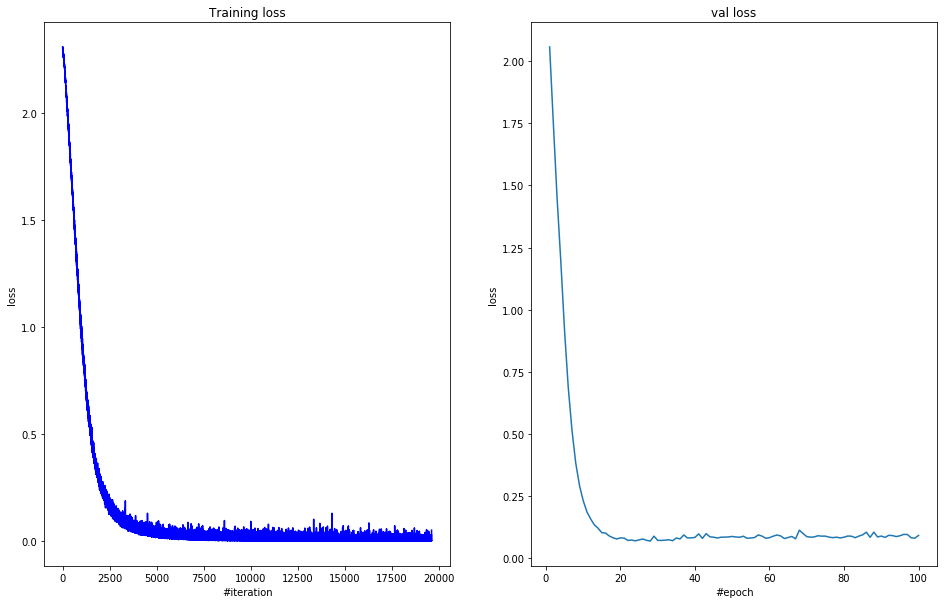






100%|██████████| 100/100 [09:58<00:00,  6.05s/it]






Current avg loss over 10 batches: 0.0166334465645709, val_loss: 0.09146956316623873, epoch: 99
validation loss history:  [2.0578654  1.75001386 1.44949194 1.19518897 0.9177742  0.68682196
 0.51477864 0.38320805 0.29372105 0.23197146 0.18633488 0.15801767
 0.13396091 0.12048174 0.10242456 0.10085834 0.08930193 0.08199707
 0.07714734 0.08150242 0.08065316 0.07129636 0.07299535 0.0696082
 0.0734709  0.07699925 0.07187547 0.06863146 0.08851317 0.07147193
 0.07129921 0.07242188 0.07405904 0.07005641 0.08110732 0.07720535
 0.09333783 0.08124568 0.08156255 0.08358658 0.09765163 0.07956667
 0.09867705 0.08590965 0.08427535 0.0810873  0.08435605 0.08451864
 0.08529775 0.08734536 0.08514693 0.08402969 0.08834311 0.07984642
 0.08114853 0.08295561 0.09350034 0.08869974 0.0799475  0.08244094
 0.0883942  0.09312736 0.08941153 0.0788677  0.08309578 0.08729022
 0.07772794 0.11255882 0.09895074 0.08678787 0.08431407 0.08541614
 0.09009968 0.08857099 0.08854018 0.08431196 0.08256521 0.08436804
 0.081390

In [131]:
%%time
train_loss, val_loss = train_loop(net, n_epoch, batch_size, optimizer_config, optimizer_state)

In [135]:
dims = [784, 392, 196, 98, 49]

net = Sequential()
for d1, d2 in zip(dims[:-1], dims[1:]):
    net.add(Linear(d1, d2))
    net.add(LeakyReLU())
    net.add(BatchNormalization(0.5))
    net.add(ChannelwiseScaling(d2))
    net.add(Dropout(p=0.3))
net.add(Linear(d2, 10))
net.add(LogSoftMax())
print(net)
optimizer_config = {'learning_rate' : 0.0001, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8}
optimizer_state = {}

# Looping params
n_epoch = 28
batch_size = 256

Linear 784 -> 392
LeakyReLU
BatchNormalization
ChannelwiseScaling
Dropout
Linear 392 -> 196
LeakyReLU
BatchNormalization
ChannelwiseScaling
Dropout
Linear 196 -> 98
LeakyReLU
BatchNormalization
ChannelwiseScaling
Dropout
Linear 98 -> 49
LeakyReLU
BatchNormalization
ChannelwiseScaling
Dropout
Linear 49 -> 10
LogSoftMax



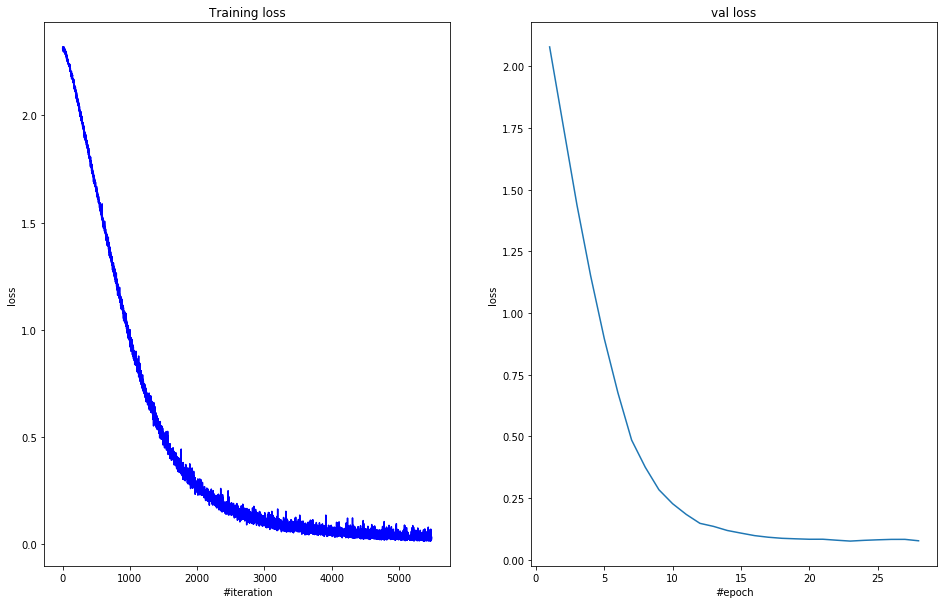






100%|██████████| 28/28 [02:50<00:00,  6.12s/it]






Current avg loss over 10 batches: 0.028665049939182258, val_loss: 0.07688060669105097, epoch: 27
validation loss history:  [2.07800705 1.75729486 1.43752338 1.15093738 0.89596165 0.67610021
 0.48514917 0.37482461 0.28355088 0.22713589 0.18364611 0.14752521
 0.13510449 0.11863285 0.10798908 0.09779099 0.09128216 0.08691722
 0.08484926 0.08304234 0.08313236 0.07917952 0.07561065 0.07862922
 0.08077781 0.08248766 0.08260829 0.07688061]
best loss after epoch: 23 is 0.07561064536037082
CPU times: user 10min 36s, sys: 6.91 s, total: 10min 42s
Wall time: 2min 50s


In [136]:
%%time
train_loss, val_loss = train_loop(net, n_epoch, batch_size, optimizer_config, optimizer_state)

Print here your accuracy on test set. It should be around 90%.

In [132]:
from sklearn.metrics import accuracy_score

In [137]:
# Your answer goes here. ################################################
net.evaluate()
preds = net.forward(X_test)
accuracy_score(y_test.argmax(axis=1), preds.argmax(axis=1))

0.9818